Link to dataset
https://archive.ics.uci.edu/ml/datasets/Cardiotocography#

In [25]:
# FileName	of CTG examination
# Date	of the examination
# b	start instant
# e	end instant
# LBE	baseline value (medical expert)
# LB	baseline value (SisPorto)
# AC	accelerations (SisPorto)
# FM	foetal movement (SisPorto)
# UC	uterine contractions (SisPorto)
# ASTV	percentage of time with abnormal short term variability  (SisPorto)
# mSTV	mean value of short term variability  (SisPorto)
# ALTV	percentage of time with abnormal long term variability  (SisPorto)
# mLTV	mean value of long term variability  (SisPorto)
# DL	light decelerations
# DS	severe decelerations
# DP	prolongued decelerations
# DR	repetitive decelerations
# Width	histogram width
# Min	low freq. of the histogram
# Max	high freq. of the histogram
# Nmax	number of histogram peaks
# Nzeros	number of histogram zeros
# Mode	histogram mode
# Mean	histogram mean
# Median	histogram median
# Variance	histogram variance
# Tendency	histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
# A	calm sleep
# B	REM sleep
# C	calm vigilance
# D	active vigilance
# SH	shift pattern (A or Susp with shifts)
# AD	accelerative/decelerative pattern (stress situation)
# DE	decelerative pattern (vagal stimulation)
# LD	largely decelerative pattern
# FS	flat-sinusoidal pattern (pathological state)
# SUSP	suspect pattern
# CLASS	Class code (1 to 10) for classes A to SUSP
# NSP	Normal=1; Suspect=2; Pathologic=3


In [26]:
import pandas as pd

In [27]:
df=pd.read_excel('CTG.xls',sheet_name='Raw Data')

In [28]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [29]:
df.shape

(2130, 40)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [31]:
df.describe

<bound method NDFrame.describe of           FileName       Date      SegFile       b       e    LBE     LB   AC  \
0              NaN        NaT          NaN     NaN     NaN    NaN    NaN  NaN   
1     Variab10.txt 1996-12-01  CTG0001.txt   240.0   357.0  120.0  120.0  0.0   
2       Fmcs_1.txt 1996-05-03  CTG0002.txt     5.0   632.0  132.0  132.0  4.0   
3       Fmcs_1.txt 1996-05-03  CTG0003.txt   177.0   779.0  133.0  133.0  2.0   
4       Fmcs_1.txt 1996-05-03  CTG0004.txt   411.0  1192.0  134.0  134.0  2.0   
...            ...        ...          ...     ...     ...    ...    ...  ...   
2125  S8001045.dsp 1998-06-06  CTG2127.txt  1576.0  3049.0  140.0  140.0  1.0   
2126  S8001045.dsp 1998-06-06  CTG2128.txt  2796.0  3415.0  142.0  142.0  1.0   
2127           NaN        NaT          NaN     NaN     NaN    NaN    NaN  NaN   
2128           NaN        NaT          NaN     NaN     NaN    NaN    NaN  NaN   
2129           NaN        NaT          NaN     NaN     NaN    NaN    NaN  N

## EDA

In [32]:
#drop the first 3 columns
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)

In [33]:
#drop rows with missing values
df.dropna(inplace=True)

In [34]:
df.shape

(2126, 37)

<AxesSubplot:>

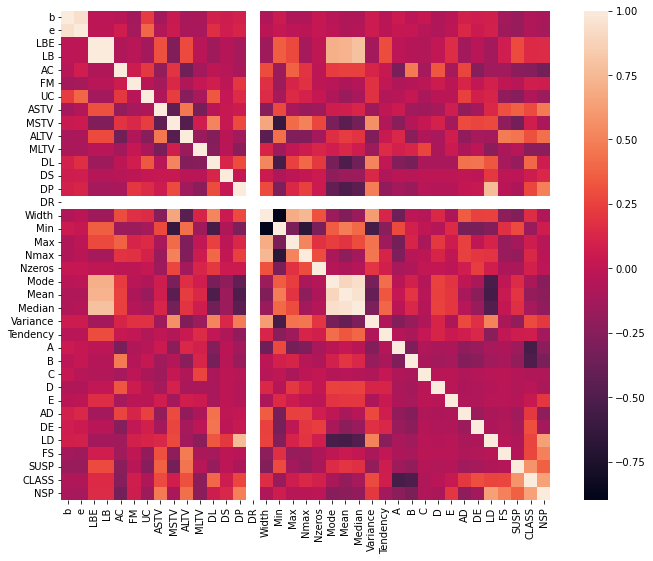

In [35]:
#correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

In [36]:
#PCA analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separating out the features
x = df.iloc[:, 0:36].values
# Separating out the target
y = df.iloc[:,-1].values

Text(0, 0.5, 'cumulative explained variance')

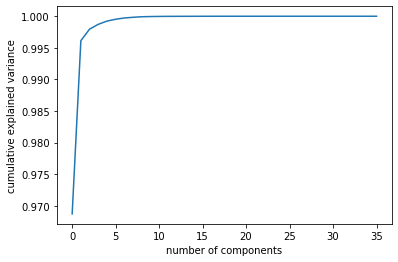

In [37]:

#show graph to determine number of components
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

25 PCA components explain 95%+ of the variance

In [38]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=0)

In [39]:
#standardize the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
#apply PCA
pca = PCA(n_components=25)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

## Predicting the class values using Random forest, SVM, KNN

In [41]:
#import classification report
from sklearn.metrics import classification_report

In [42]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       326
         2.0       0.98      0.78      0.87        58
         3.0       1.00      0.86      0.92        42

    accuracy                           0.95       426
   macro avg       0.97      0.88      0.92       426
weighted avg       0.95      0.95      0.95       426



The Random Forest classifier demonstrated outstanding performance with an impressive overall accuracy of 0.95 (95%).

It excelled in predicting class 1.0, exhibiting exceptional precision, recall, and F1-score of 0.94, 1.00, and 0.97, respectively.

For class 2.0, the classifier achieved a commendable precision of 0.98. Although the recall was slightly lower at 0.78, the resulting F1-score was still respectable at 0.87.

In the case of class 3.0, the classifier achieved remarkable precision and recall scores of 1.00 and 0.86, respectively, resulting in an impressive F1-score of 0.92.

In [43]:
#svm
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=123)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       326
         2.0       0.96      0.90      0.93        58
         3.0       1.00      1.00      1.00        42

    accuracy                           0.98       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.98      0.98      0.98       426



The SVM classifier showcased exceptional performance, achieving an impressive overall accuracy of 0.98 (98%).

It demonstrated remarkable precision, recall, and F1-scores for all classes, with values ranging from 0.98 to 1.00.

For class 1.0, the classifier achieved a precision of 0.98 and a recall of 0.99, resulting in an outstanding F1-score of 0.99.

In the case of class 2.0, the classifier exhibited a precision score of 0.96, indicating a high level of accuracy in positive predictions. The recall score was 0.90, suggesting that the classifier successfully identified a substantial portion of the positive instances. The resulting F1-score for this class was 0.93.

For class 3.0, the classifier achieved a perfect precision and recall score of 1.00, indicating flawless performance in predicting positive instances. Consequently, the F1-score for this class was also a perfect 1.00.

In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       326
         2.0       0.98      0.91      0.95        58
         3.0       1.00      1.00      1.00        42

    accuracy                           0.99       426
   macro avg       0.99      0.97      0.98       426
weighted avg       0.99      0.99      0.99       426



The KNN classifier exhibited outstanding performance, achieving an impressive overall accuracy of 0.99 (99%).

Similar to the SVM classifier, it delivered excellent results across all classes, showcasing high precision, recall, and F1-scores ranging from 0.99 to 1.00.

For class 1.0 and 2.0, the classifier achieved a precision, recall, and F1-score of 0.99, indicating precise and accurate predictions. The model performed exceptionally well in identifying positive instances for these classes.

Furthermore, class 3.0 was predicted flawlessly, attaining perfect precision, recall, and F1-scores of 1.00. This indicates the classifier's ability to identify and classify instances belonging to class 3.0 with absolute accuracy.

In summary, all three classifiers (Random Forest, SVM, and KNN) performed well, with overall accuracies above 0.95. However, the SVM and KNN classifiers achieved slightly higher accuracy compared to the Random Forest classifier. The SVM classifier showed the best performance with near-perfect precision, recall, and F1-scores for all classes.

In [45]:
#do random forest without pca 
x = df.iloc[:, 0:36].values
# Separating out the target
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=123)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

#Classification report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97       336
         2.0       1.00      0.65      0.79        55
         3.0       1.00      1.00      1.00        35

    accuracy                           0.96       426
   macro avg       0.98      0.88      0.92       426
weighted avg       0.96      0.96      0.95       426



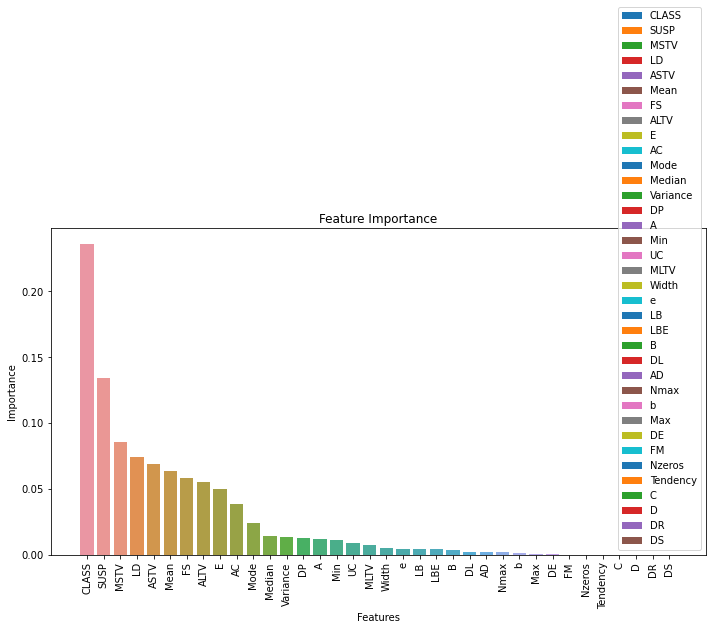

In [46]:
#Feature Importance plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame(rf.feature_importances_,
                                      index = df.iloc[:, 0:36].columns,
                                        columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()

# Add legend
legend_labels = feature_importances.index.tolist()
legend_handles = [plt.bar(legend_labels[i], 0, color=sns.color_palette(n_colors=len(legend_labels))[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)

we run Random forest without applying PCA to get the feature importance and we get the following results:

CLASS is the most important feature followed by SUSP and MSTV